### Dealing with Imbalanced Classes

#### Agenda

* What are imbalanced classes & their impact ?
* OverSampling
* UnderSampling
* SMOTE

<hr>



### 1. Imbalanced Classes & Impact
* Data with skewed class distribution.
* Common examples are spam/ham mails, malicious/normal packets.
* Classification algorithms are prone to predict data with heavier class.
* accuracy_score is not the right matrix.
* We got to rely on metrices like recall, precision 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.metrics import confusion_matrix
from collections import Counter

In [2]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

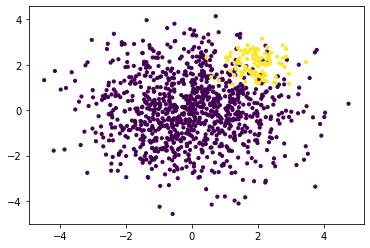

In [3]:
plt.scatter(X[:,0], X[:,1],s=10,c=y)

In [4]:
from sklearn.svm import SVC

In [5]:
svc = SVC(kernel='linear')

In [13]:
svc.fit(X,y)
pred = svc.predict(X)

In [14]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [15]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

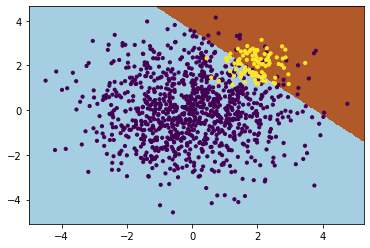

In [16]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')
plt.scatter(X[:,0],X[:,1],c=y,s=10)

* As we can see, decision boundry is impacted
* imbalanced package provides many such sampling techniques - `pip install imbalanced`

### 2. OverSampling
* One way to fight this issue is to generate new samples in the classes which are under-represented. 
* may increase likelihood of overfitting as data is duplicated
* RandomOverSampler is simpliest api to provide such functionality


#### RandomOverSampler

In [21]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                            n_redundant=0, n_repeated=0, n_classes=3,
                            n_clusters_per_class=1,
                            weights=[0.01, 0.05, 0.94],
                            class_sep=0.8, random_state=0)

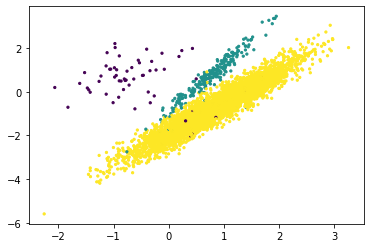

In [22]:
plt.scatter(X[:,0], X[:,1],s=5,c=y)

In [10]:
svc.fit(X,y)
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

array([[  48,    4,   12],
       [   0,  230,   32],
       [   0,    4, 4670]], dtype=int64)

In [11]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [12]:
from sklearn.metrics import confusion_matrix
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

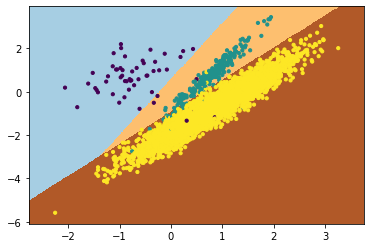

In [13]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [14]:
from imblearn.over_sampling import RandomOverSampler

In [15]:
ros = RandomOverSampler(random_state=0)

In [17]:
X_resampled, y_resampled = ros.fit_resample(X,y)

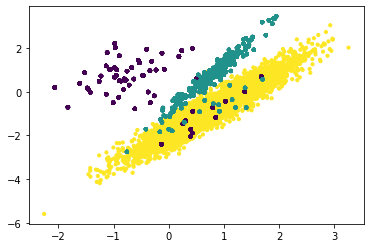

In [18]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [19]:
svc.fit(X_resampled,y_resampled)

SVC(kernel='linear')

In [20]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

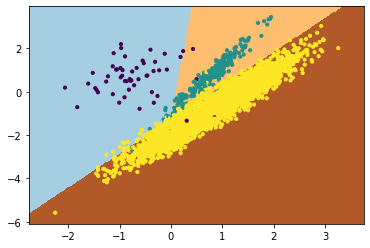

In [22]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [23]:
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

array([[  49,    3,   12],
       [   9,  237,   16],
       [  38,   53, 4583]], dtype=int64)

### 3. SMOTE (Synthetic Minority Oversampling Technique)
* Selects minority class instance "a" at random and find its k nearest minority neighbors.
* among k neighbors select "b" at random 
* synthetic instance is generated using a and b
* It doesn't duplicates data

In [23]:
from imblearn.over_sampling import SMOTE

In [25]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

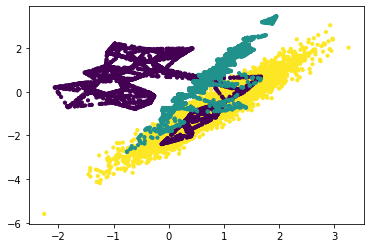

In [26]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [27]:
svc.fit(X_resampled,y_resampled)

SVC(class_weight='balanced', kernel='linear')

In [82]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

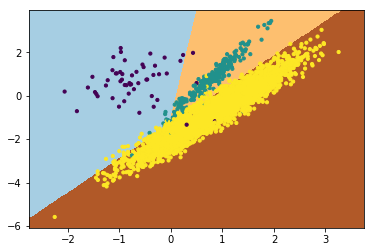

In [83]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [84]:
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

array([[  49,    3,   12],
       [   7,  239,   16],
       [  39,   51, 4584]], dtype=int64)

### 4. Undersampling
* Reducing the data of the over-represented class

#### RandomUnderSampler
* The reduced data is picked randomly from the sample & not derived

In [91]:
from imblearn.under_sampling import RandomUnderSampler

In [92]:
rus = RandomUnderSampler(random_state=0)

In [94]:
X_resampled, y_resampled = rus.fit_sample(X, y)

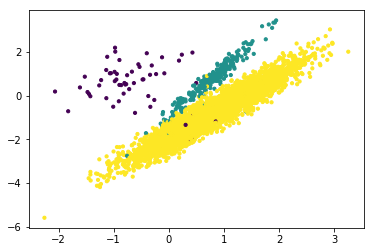

In [97]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

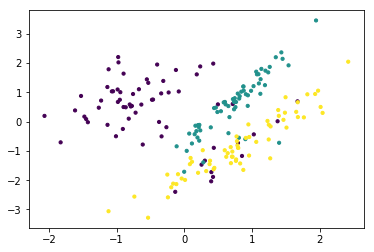

In [98]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [99]:
print(sorted(Counter(y).items()))

[(0, 64), (1, 262), (2, 4674)]


In [100]:
print(sorted(Counter(y_resampled).items()))

[(0, 64), (1, 64), (2, 64)]


### 5. Making learning algorithms aware of class distribution
* Most of the classfication algorithms provides a method to pass class distribution information
* Internally, learning algorithm uses this & configures itself for justifying under represented class

In [130]:
from sklearn.svm import SVC

In [131]:
svc = SVC(kernel='linear')

In [140]:
svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [141]:
pred = svc.predict(X)

In [142]:
confusion_matrix(y_pred=pred, y_true=y)

array([[  48,    4,   12],
       [   0,  230,   32],
       [   0,    4, 4670]], dtype=int64)

In [143]:
svc = SVC(kernel='linear', class_weight='balanced')

In [144]:
svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [145]:
pred = svc.predict(X)

In [146]:
confusion_matrix(y_pred=pred, y_true=y)

array([[  49,    3,   12],
       [   3,  243,   16],
       [  28,   62, 4584]], dtype=int64)